## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data=pd.read_csv('\\AirQualityUCI.csv',delimiter=';')

In [3]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


So as seen above concentration of different gases at every hour of the day is recorded. 

In [4]:
data.shape

(9471, 17)

In [5]:
data.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [6]:
data.dropna(axis=1,how='all',inplace=True)
data.dropna(axis=0,how='all',inplace=True)

Dropping the columns and rows with NaN values from the DataSet

In [7]:
data.shape

(9357, 15)

In [8]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [9]:
data['Date'] = pd.to_datetime(data['Date'])

Converting the 'Date' column in a datetime dtype

Some Values have ',' instead of '.' 
Replacing ',' with '.'

In [10]:
for col in data.iloc[:,2:].columns :
    if data[col].dtypes ==object :
        data[col] = data[col].str.replace(',', '.').astype('float')

In [11]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-10-03,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Most values have concentration value as -200 which is a spurious value as concentration can never have negative value.Cleaning all these negative values. 

In [12]:
def average(num):
    return num[num>-200].mean()

daily_data = data.drop('Time', axis=1).groupby('Date').apply(average)

In [13]:
daily_data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
2004-01-04,2.550000,1244.380952,310.125,11.971429,1010.428571,161.304348,880.666667,96.739130,1644.380952,1155.857143,15.519048,51.133333,0.854881
2004-01-05,2.056522,1097.500000,275.000,8.662500,913.708333,104.739130,918.083333,84.956522,1640.416667,904.625000,20.150000,52.183333,1.167312
2004-01-06,2.100000,1135.583333,NaN,12.375000,1021.875000,152.043478,896.791667,75.869565,1881.500000,1066.958333,20.325000,66.154167,1.533350
2004-01-07,2.162500,1130.583333,NaN,12.225000,1038.541667,139.695652,740.916667,113.434783,1854.250000,1059.625000,30.450000,39.691667,1.624108
2004-01-08,0.983333,974.166667,NaN,5.808333,792.583333,51.739130,880.083333,58.521739,1559.000000,670.583333,30.654167,42.120833,1.673521


In [14]:
daily_data.isna().sum()

CO(GT)            36
PT08.S1(CO)        8
NMHC(GT)         347
C6H6(GT)           8
PT08.S2(NMHC)      8
NOx(GT)           34
PT08.S3(NOx)       8
NO2(GT)           34
PT08.S4(NO2)       8
PT08.S5(O3)        8
T                  8
RH                 8
AH                 8
dtype: int64

In [15]:
droppedna=daily_data.dropna(axis=0)

In [16]:
droppedna.shape

(44, 13)

In [17]:
droppedna.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
2004-01-04,2.550000,1244.380952,310.125000,11.971429,1010.428571,161.304348,880.666667,96.739130,1644.380952,1155.857143,15.519048,51.133333,0.854881
2004-01-05,2.056522,1097.500000,275.000000,8.662500,913.708333,104.739130,918.083333,84.956522,1640.416667,904.625000,20.150000,52.183333,1.167312
2004-02-04,2.800000,1288.916667,367.083333,13.208333,1059.291667,153.652174,844.166667,118.521739,1708.708333,1197.375000,17.941667,49.104167,0.934888
2004-03-04,1.560000,1307.208333,163.800000,10.887500,989.708333,111.333333,862.458333,86.333333,1659.125000,1140.458333,19.133333,45.700000,0.960704
2004-03-13,2.695652,1330.666667,139.250000,10.916667,992.833333,184.434783,993.208333,118.869565,1595.791667,1245.916667,12.866667,51.533333,0.732296


In [18]:
(daily_data.isna().sum() <= 8)

CO(GT)           False
PT08.S1(CO)       True
NMHC(GT)         False
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)          False
PT08.S3(NOx)      True
NO2(GT)          False
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
dtype: bool

Getting rid of the columns that has NaN values grreater than 8

In [19]:
#Taking only the features which have less than 8 NaN Values
daily_data = daily_data.iloc[:,(daily_data.isna().sum() <= 8).values]

In [20]:
daily_data.shape

(391, 9)

In [21]:
daily_data = daily_data.dropna()

In [22]:
daily_data.shape

(383, 9)

Converting the daily data into weekly data

In [23]:
week_data = daily_data.resample('W').mean()

In [24]:
week_data.head()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,
2004-01-04,1244.380952,11.971429,1010.428571,880.666667,1644.380952,1155.857143,15.519048,51.133333,0.854881
2004-01-11,1136.801760,11.674457,1009.344462,760.484990,1727.833075,1083.683747,24.564726,53.224017,1.526858
2004-01-18,1173.375000,13.429167,1050.458333,1490.333333,1448.541667,1196.333333,10.891667,77.000000,1.002796
2004-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Removing NaN values from the weekly data

In [25]:
week_data=week_data.dropna()

In [26]:
week_data.shape

(73, 9)

Importing Prophet 

In [27]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


Plotting weekly data

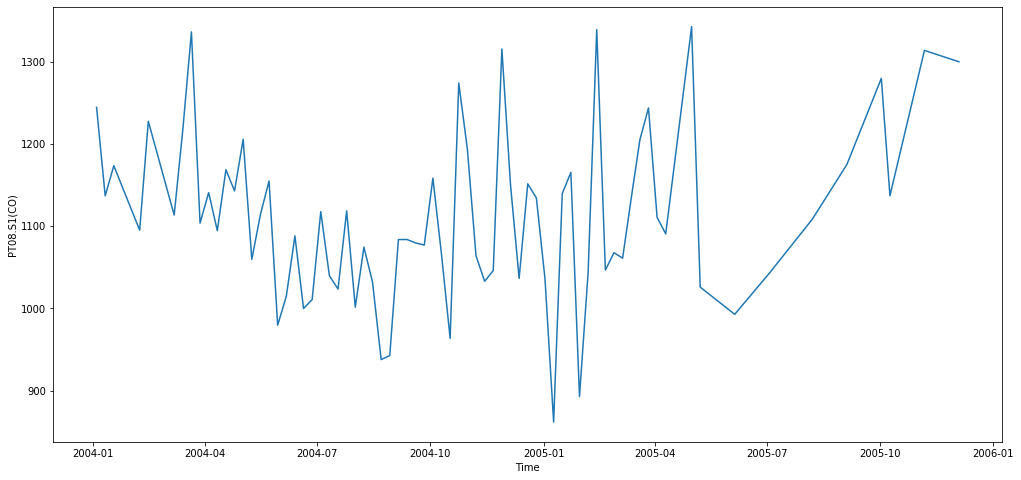

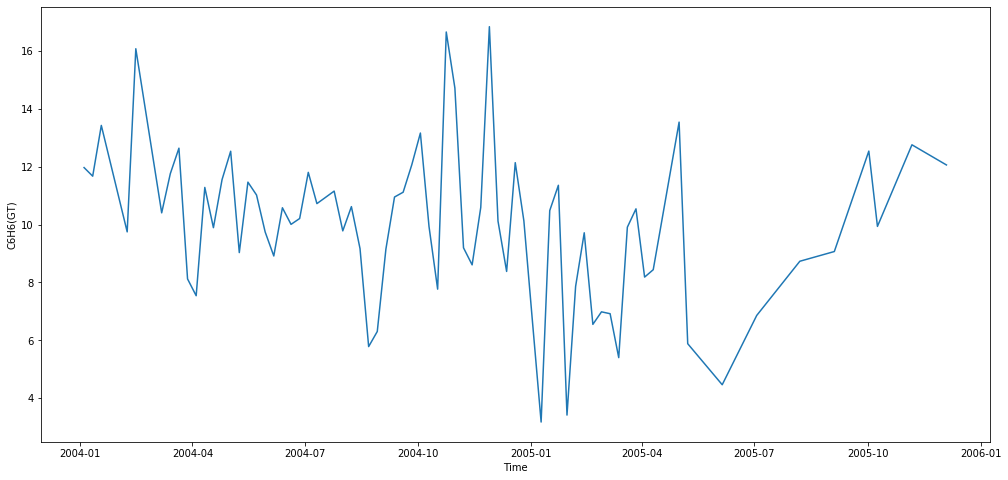

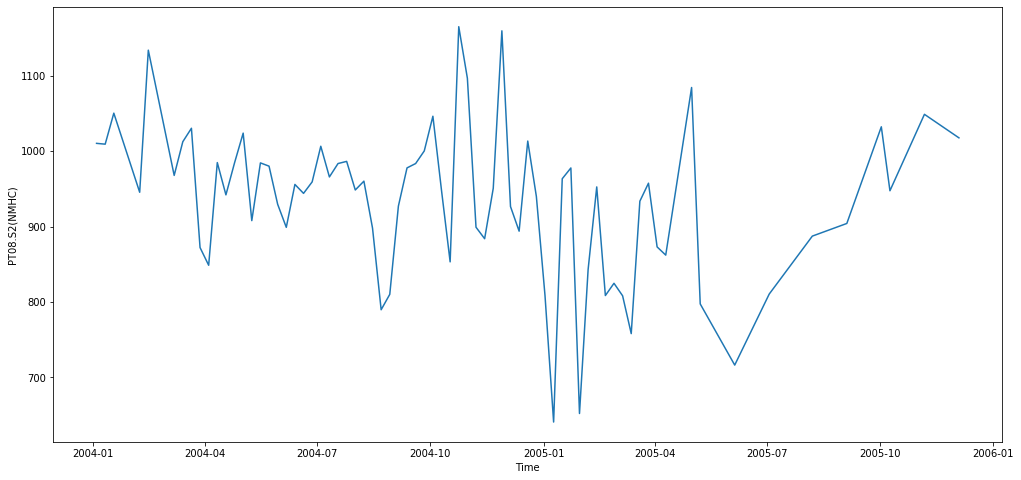

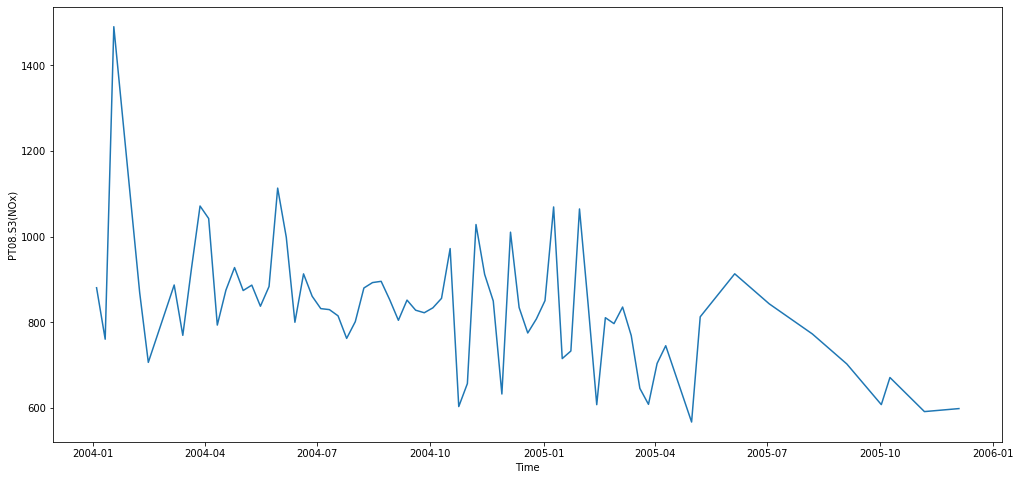

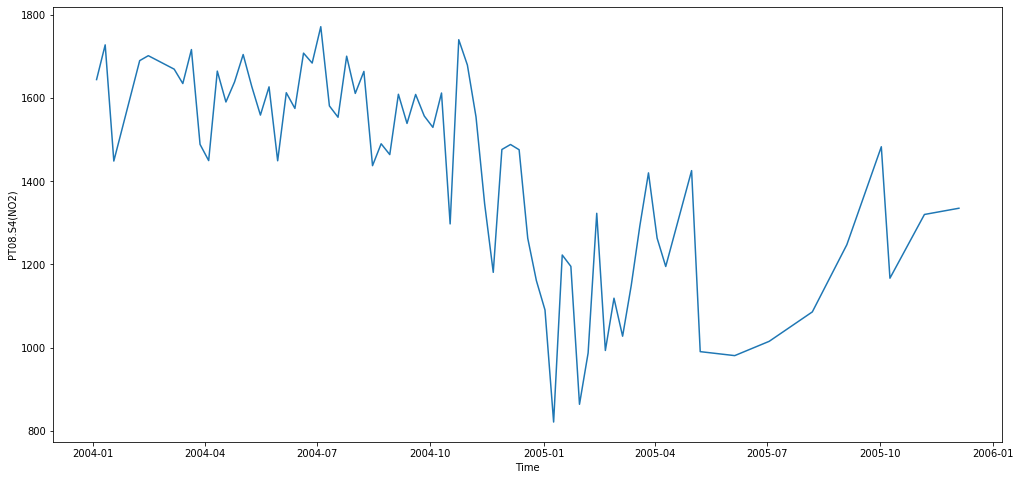

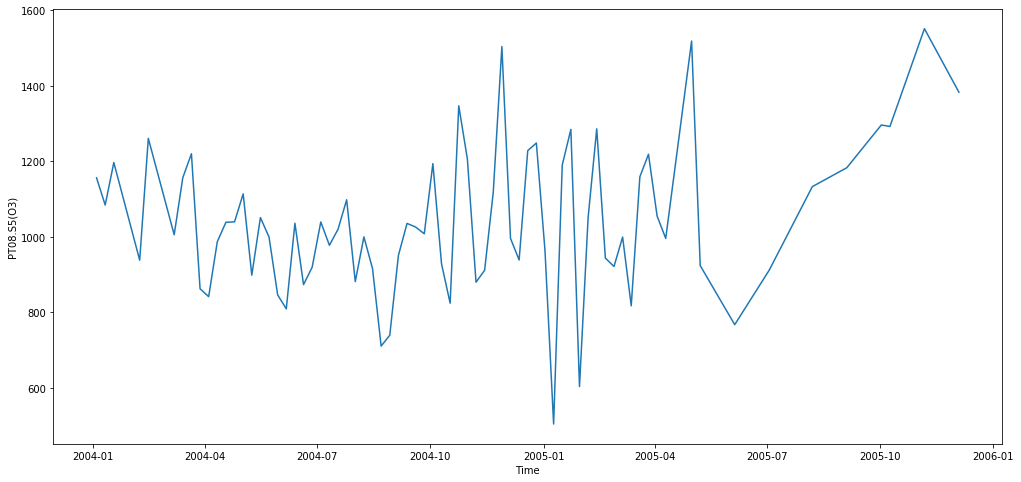

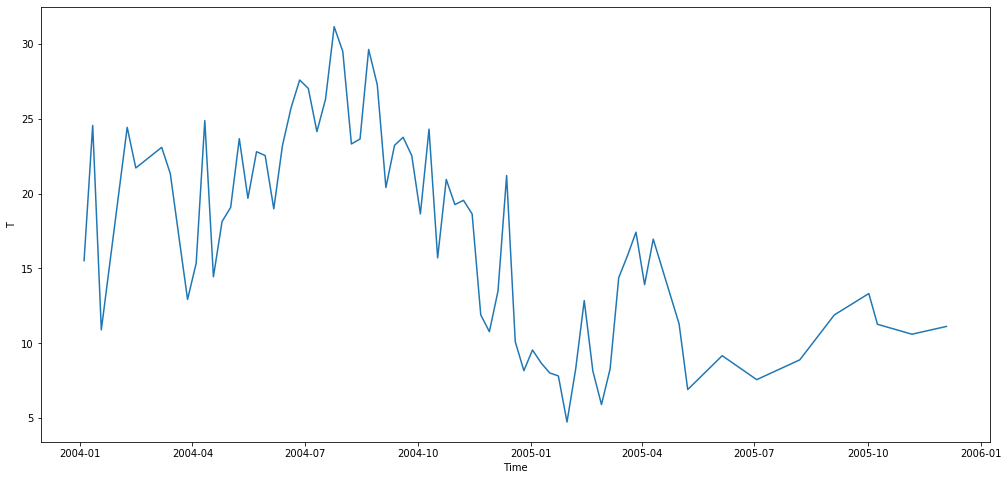

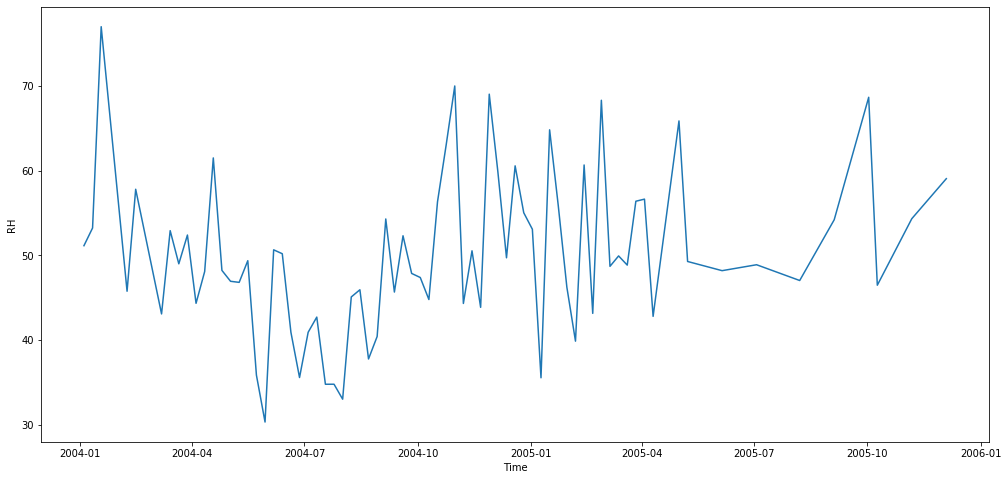

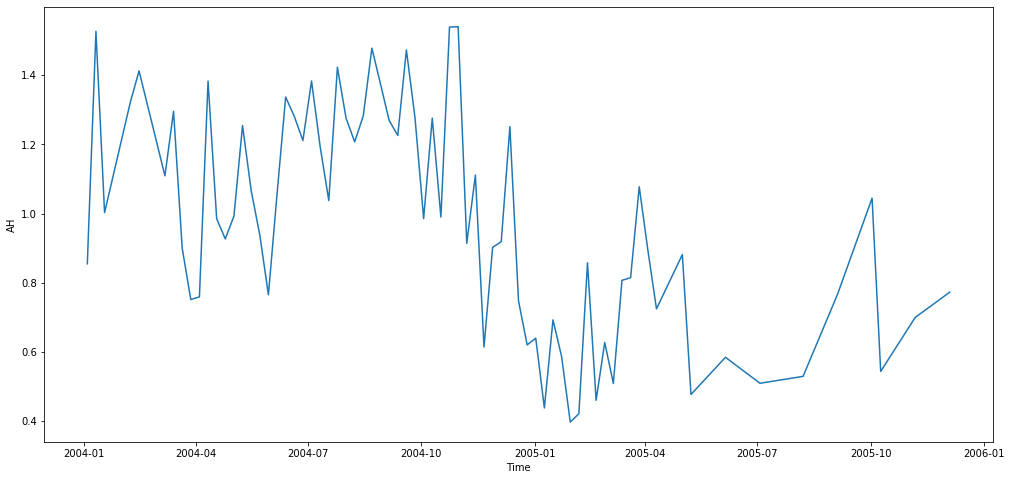

In [28]:
def plot_data(col):
    plt.figure(figsize=(17, 8))
    plt.plot(week_data[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
for col in week_data.columns:
    plot_data(col)

In [29]:
week_data.columns

Index(['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

Currently focusing on NOx data here

In [30]:
week_data2=week_data['PT08.S3(NOx)']

In [31]:
week_data2.head()

Date
2004-01-04     880.666667
2004-01-11     760.484990
2004-01-18    1490.333333
2004-02-08     869.108333
2004-02-15     706.395833
Name: PT08.S3(NOx), dtype: float64

In [32]:
week_data2.shape

(73,)

In [33]:
df = week_data2.reset_index()
df.columns = ['ds','y']
df.head()

,ds,y
0,2004-01-04,880.666667
1,2004-01-11,760.484990
2,2004-01-18,1490.333333
3,2004-02-08,869.108333
4,2004-02-15,706.395833


In [34]:
df.shape

(73, 2)

taking the prediction size to be 20 here.

In [35]:
prediction=20
train_size=df[:-prediction]

Making the prophet model and Training it on the training data.

In [37]:
model=Prophet()
model.fit(train_size)

In [38]:
pred=model.make_future_dataframe(periods=prediction)
forecast=model.predict(pred)

Forecasting on the prediction size.

In [40]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-01-04,929.973177,766.211071,1088.138237,929.973177,929.973177,0.0,0.0,0.0,0.0,0.0,0.0,929.973177
1,2004-01-11,928.041427,748.786395,1086.048324,928.041427,928.041427,0.0,0.0,0.0,0.0,0.0,0.0,928.041427
2,2004-01-18,926.109676,763.578199,1100.583641,926.109676,926.109676,0.0,0.0,0.0,0.0,0.0,0.0,926.109676
3,2004-02-08,920.314424,749.326969,1079.313433,920.314424,920.314424,0.0,0.0,0.0,0.0,0.0,0.0,920.314424
4,2004-02-15,918.382674,744.326818,1078.969982,918.382674,918.382674,0.0,0.0,0.0,0.0,0.0,0.0,918.382674


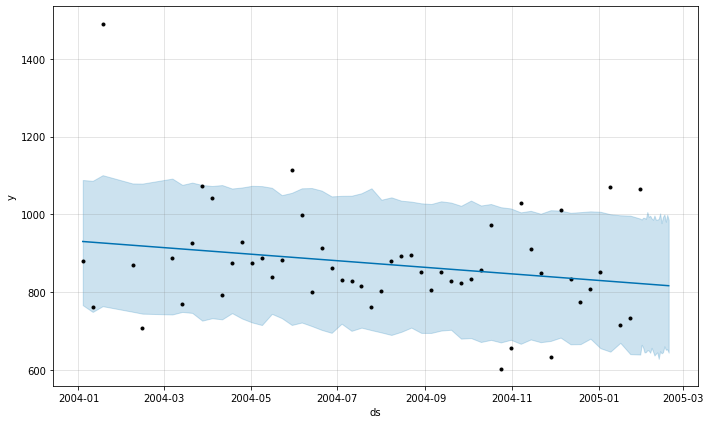

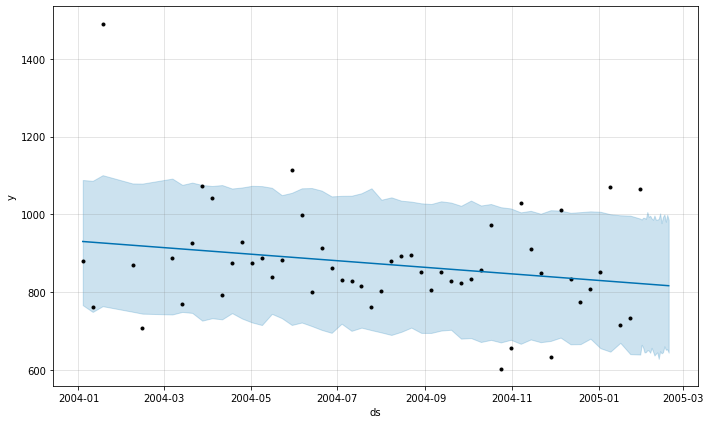

In [41]:
model.plot(forecast)

This forecasted data and plottings doesn't consider seasonality

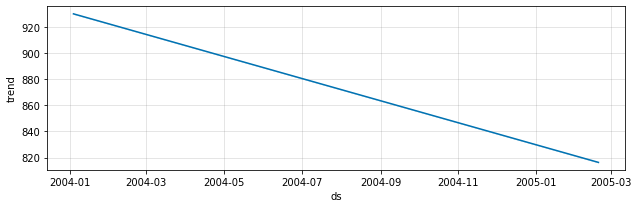

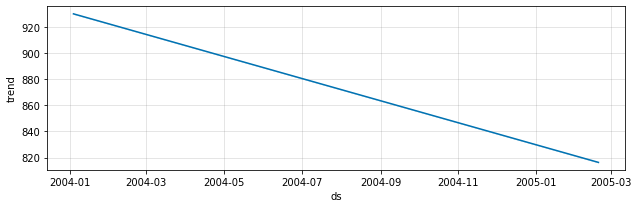

In [42]:
model.plot_components(forecast)

Prophet identified trend here without Seasonality

### Model Evaluation with Mean Absolute Percentage Error and Mean Absolute Error

In [44]:
def comparison(data,forecast):
    return forecast.set_index('ds')[['trend','yhat_lower','yhat_upper']].join(data.set_index('ds'))

In [45]:
comp=comparison(df,forecast)
comp.head()

,trend,yhat_lower,yhat_upper,y
ds,,,,
2004-01-04,929.973177,766.211071,1088.138237,880.666667
2004-01-11,928.041427,748.786395,1086.048324,760.484990
2004-01-18,926.109676,763.578199,1100.583641,1490.333333
2004-02-08,920.314424,749.326969,1079.313433,869.108333
2004-02-15,918.382674,744.326818,1078.969982,706.395833


In [46]:
def evaluation(predictionvalue,comparis):
    comparis=comparis.copy()
    comparis['ae']=comparis['y']-comparis['trend']
    comparis['pae']=(comparis['ae']/comparis['y'])*100
    predict=comparis[-predictionvalue:]
    error_mean=lambda error:np.mean(np.abs(predict[error]))
    return{'MAPE':error_mean('pae'),'MAE':error_mean('ae')}
    

In [47]:
evaluation(prediction,comp)

{'MAPE': 18.62696973002372, 'MAE': 116.26095674464494}

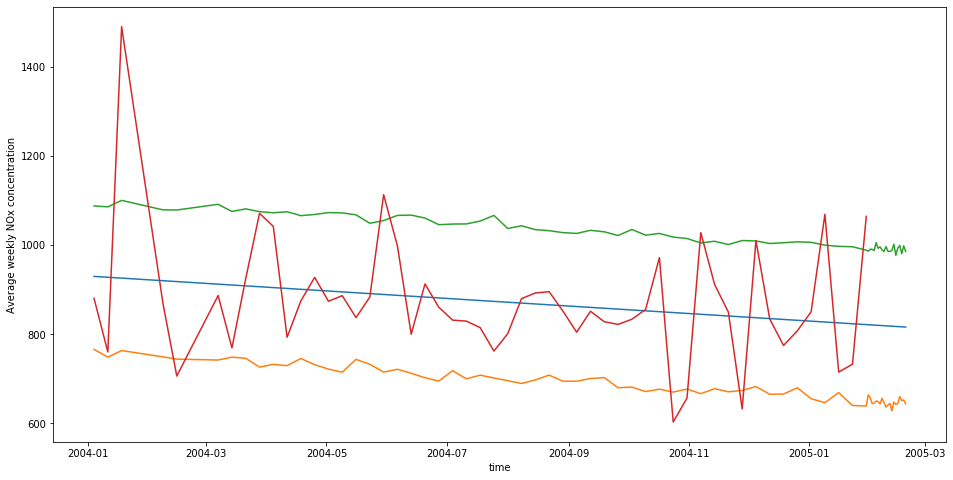

In [48]:
plt.figure(figsize=(16,8))
plt.plot(comp['trend'])
plt.plot(comp['yhat_lower'])
plt.plot(comp['yhat_upper'])
plt.plot(comp['y'])
plt.xlabel('time')
plt.ylabel('Average weekly NOx concentration')
plt.show()